### Data preprocessing Ver 1.0

This file will preprocess the "healthcare-dataset-stroke-data.csv" data.
The processed data are summarized in the last cell, which includes:
1. Unbalanced processed file with label encoding, filling in missing data with column mean, and dropping irrelevent feature
2. Balanced data using the SMOTE algorithm
3. Dimension reducued data (2D and 3D) using T-SNE and PCA


In [8]:
import pandas as pd
import sys
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

In [9]:
## You will need to change the path to where the "healthcare-dataset-stroke-data.csv" file is saved on your computer

rawData = pd.read_csv('/Users/tanyawen/Desktop/healthcare-dataset-stroke-data.csv')
print("The raw Data:")
print(rawData.head())
print("==============================================================================")
print('In the raw data, the target value and corrsponding number of data points are:')
print(rawData['stroke'].value_counts())

The raw Data:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
In the raw data, the target value and corr

In [10]:
## Drop Patient ID feature
processed = rawData.drop(['id'], axis = 1)

## Label encoder:
label_encoder = preprocessing.LabelEncoder()

for feature in processed:
    if (processed[feature].dtype == object):
        processed[feature]= label_encoder.fit_transform(processed[feature])

## fill NaN data in BMI with colum average
meanBMI = processed['bmi'].mean()
processed['bmi'] = processed['bmi'].fillna(value=meanBMI)

print (processed.head())

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1  


In [11]:
## Balance the data using SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)

feature = processed.iloc[:,:-1]
target = processed.iloc[:,-1]

balanced, target_balanced = sm.fit_resample(feature, target)
balanced['stroke'] = target_balanced

print("The balanced processed data:")
print(balanced)
print("==============================================================================")
print('In the balanced data, the target value and corrsponding number of data points are:')
print(balanced['stroke'].value_counts())

The balanced processed data:
      gender        age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.000000             0              1             1          2   
1          0  61.000000             0              0             1          3   
2          1  80.000000             0              1             1          2   
3          0  49.000000             0              0             1          2   
4          0  79.000000             1              0             1          3   
...      ...        ...           ...            ...           ...        ...   
9717       0  79.871507             1              0             1          2   
9718       0  70.908861             0              0             1          0   
9719       1  80.000000             0              0             1          2   
9720       0  74.953742             0              0             1          3   
9721       0  60.467509             0              0             1          2   

In [13]:
## Normalized data
sc = StandardScaler()
unbNorm = sc.fit_transform(processed.iloc[:,:-1]) # normalzied unbalanced processed data
balNorm = sc.fit_transform(balanced.iloc[:,:-1]) # normalzied balanced data


In [14]:
## TSNE to reduced dimension to either 2D or 3D

tsne2D = TSNE(n_components = 2)
tsne3D = TSNE(n_components = 3)

unbTsne2D = tsne2D.fit_transform(unbNorm)
unbTsne3D = tsne3D.fit_transform(unbNorm)

balTsne2D = tsne2D.fit_transform(balNorm)
balTsne3D = tsne3D.fit_transform(balNorm)

dfUnbTsne2D = pd.DataFrame(unbTsne2D, columns=["tsne_feature_1", "tsne_feature_2"])
dfUnbTsne2D["labels"] = processed.iloc[:,-1]

dfBalTsne2D = pd.DataFrame(balTsne2D, columns=["tsne_feature_1", "tsne_feature_2"])
dfBalTsne2D["labels"] = balanced.iloc[:,-1]

dfUnbTsne3D = pd.DataFrame(unbTsne3D, columns=["tsne_feature_1", "tsne_feature_2", "tsne_feature_3"])
dfUnbTsne3D["labels"] = processed.iloc[:,-1]

dfBalTsne3D = pd.DataFrame(balTsne3D, columns=["tsne_feature_1", "tsne_feature_2", "tsne_feature_3"])
dfBalTsne3D["labels"] = processed.iloc[:,-1]

print ("Done !")

/Users/tanyawen/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/tanyawen/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/tanyawen/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/tanyawen/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/tanyawen/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.wa

Done !


[Text(0.5, 1.0, 'preprocessed unbalanced data (TSNE 2D)')]

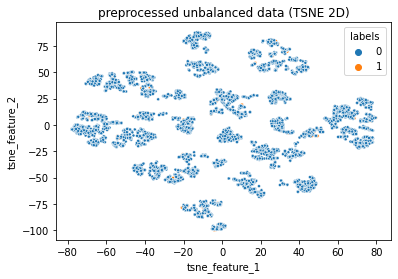

In [39]:
## unbalanced TSNE 2D plot:

plot1 = sns.scatterplot(data=dfUnbTsne2D, x="tsne_feature_1", y="tsne_feature_2", hue="labels",marker = '.')
plot1.set(title = "preprocessed unbalanced data (TSNE 2D)")

[Text(0.5, 1.0, 'balanced data (TSNE 2D)')]

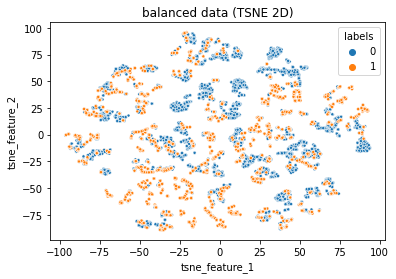

In [40]:
## balacned TSNE 2D plot:

plot2 = sns.scatterplot(data=dfBalTsne2D, x="tsne_feature_1", y="tsne_feature_2", hue="labels",marker = '.')
plot2.set(title = "balanced data (TSNE 2D)")

Text(0.5, 0, 'tsne_feature_3')

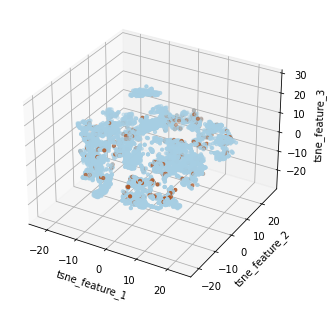

In [41]:
## unbalanced 3D plot (TSNE)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(unbTsne3D[:,0], unbTsne3D[:,1], unbTsne3D[:,2], s=40, c=processed.iloc[:,-1], marker='.', cmap='Paired')
ax.set_xlabel('tsne_feature_1')
ax.set_ylabel('tsne_feature_2')
ax.set_zlabel('tsne_feature_3')


Text(0.5, 0, 'tsne_feature_3')

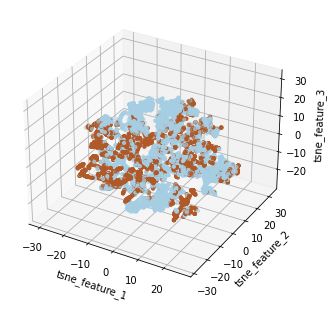

In [38]:
## balanced 3D plot (TSNE)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(balTsne3D[:,0], balTsne3D[:,1], balTsne3D[:,2], s=40, c=balanced.iloc[:,-1], marker='.', cmap='Paired')
ax.set_xlabel('tsne_feature_1')
ax.set_ylabel('tsne_feature_2')
ax.set_zlabel('tsne_feature_3')


In [42]:
## PCA to reduced dimension to either 2D or 3D

pca2D = PCA(n_components=2)
pca3D = PCA(n_components=3)

unbPca2D  = pca2D.fit_transform(processed)
unbPca3D  = pca3D.fit_transform(processed)

balPca2D  = pca2D.fit_transform(unbNorm)
balPca3D  = pca3D.fit_transform(balNorm)

dfUnbPca2D = pd.DataFrame(unbPca2D, columns=["PCA_feature_1", "PCA_feature_2"])
dfUnbPca2D["labels"] = processed.iloc[:,-1]

dfBalPca2D = pd.DataFrame(balPca2D, columns=["PCA_feature_1", "PCA_feature_2"])
dfBalPca2D["labels"] = balanced.iloc[:,-1]

dfUnbPca3D = pd.DataFrame(unbPca3D, columns=["PCA_feature_1", "PCA_feature_2", "PCA_feature_3"])
dfUnbPca3D["labels"] = processed.iloc[:,-1]

dfBalPca3D = pd.DataFrame(balPca3D, columns=["PCA_feature_1", "PCA_feature_2", "PCA_feature_3"])
dfBalPca3D["labels"] = balanced.iloc[:,-1]


print ("done !")

done !


[Text(0.5, 1.0, 'preprocessed unbalanced data (PCA 2D)')]

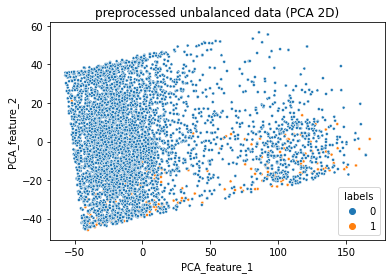

In [43]:
## unbalanced PCA 2D plot:

plot = sns.scatterplot(data=dfUnbPca2D, x="PCA_feature_1", y="PCA_feature_2", hue="labels",marker = '.')
plot.set(title = "preprocessed unbalanced data (PCA 2D)")

[Text(0.5, 1.0, 'balanced data (PCA 2D)')]

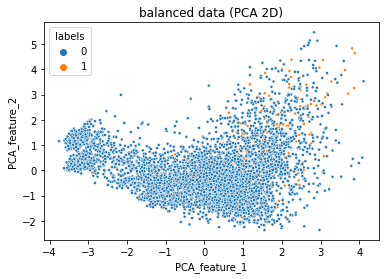

In [44]:
## balacned TSNE 2D plot:

plot = sns.scatterplot(data=dfBalPca2D, x="PCA_feature_1", y="PCA_feature_2", hue="labels",marker = '.')
plot.set(title = "balanced data (PCA 2D)")

Text(0.5, 0, 'PCA_feature_3')

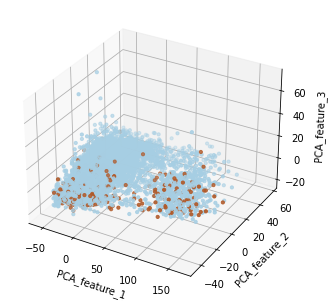

In [45]:
## unbalanced 3D plot (PCA)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(unbPca3D[:,0], unbPca3D[:,1], unbPca3D[:,2], s=40, c=processed.iloc[:,-1], marker='.', cmap='Paired')
ax.set_xlabel('PCA_feature_1')
ax.set_ylabel('PCA_feature_2')
ax.set_zlabel('PCA_feature_3')


Text(0.5, 0, 'PCA_feature_3')

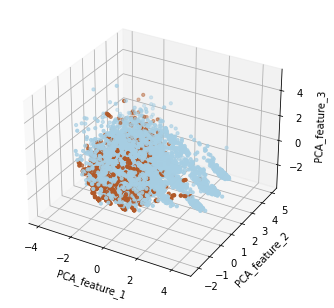

In [46]:
## balanced 3D plot (PCA)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(balPca3D[:,0], balPca3D[:,1], balPca3D[:,2], s=40, c=balanced.iloc[:,-1], marker='.', cmap='Paired')
ax.set_xlabel('PCA_feature_1')
ax.set_ylabel('PCA_feature_2')
ax.set_zlabel('PCA_feature_3')

In [47]:
8## Here are a summary of all the preporcessed data:

print ("raw data:")
print (rawData)
print ("=================================================== \n")
print ("unbalanced data (with label encoder, fill in missing data, and droped patient id):")
print (processed)
print ("=================================================== \n")
print ("balanced data:")
print (balanced)
print ("=================================================== \n")
print ("2D TSNE unbalanced data:")
print (dfUnbTsne2D)
print ("=================================================== \n")
print ("3D TSNE unbalanced data:")
print (dfUnbTsne3D)
print ("=================================================== \n")
print ("2D TSNE balanced data:")
print (dfBalTsne2D)
print ("=================================================== \n")
print ("3D TSNE balanced data:")
print (dfBalTsne3D)
print ("=================================================== \n")
print ("2D PCA unbalanced data:")
print (dfUnbPca2D)
print ("=================================================== \n")
print ("3D PCA unbalanced data:")
print (dfUnbPca3D)
print ("=================================================== \n")
print ("2D PCA balanced data:")
print (dfBalPca2D)
print ("=================================================== \n")
print ("3D PCA balanced data:")
print (dfBalPca3D)
print ("=================================================== \n")

raw data:
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36

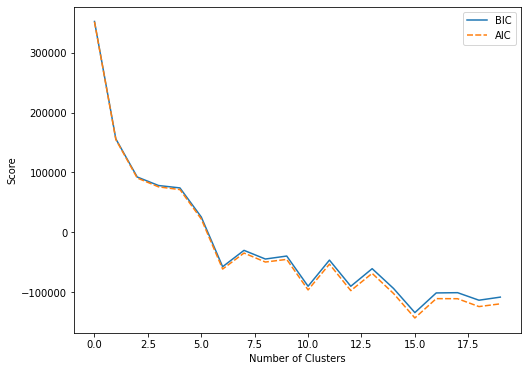

In [84]:

from sklearn.mixture import GaussianMixture

data = pd.DataFrame(balanced)

#Find the optimal number of clusters
n_components = np.arange(1, 21)
models = [GaussianMixture(n,covariance_type='full', random_state=0).fit(data) for n in n_components]
gmm_model_comparisons=pd.DataFrame({"n_components" : n_components,
                                  "BIC" : [m.bic(data) for m in models],
                                   "AIC" : [m.aic(data) for m in models]})
gmm_model_comparisons.head()
plt.figure(figsize=(8,6))
sns.lineplot(data=gmm_model_comparisons[["BIC","AIC"]])
plt.xlabel("Number of Clusters")
plt.ylabel("Score")

gmm=GaussianMixture(n_components=5,covariance_type='diag',max_iter=5000,n_init=5000,random_state=0).fit(data)
labels = gmm.predict(data)
data['cluster'] = labels

optimal_clusters = 5

In [19]:
SIGMA_CONST = 1e-6
LOG_CONST = 1e-32


class GMM(object):
    def __init__(self, X, K, max_iters = 100): 
        """
        Args: 
            X: the observations/datapoints, N x D numpy array
            K: number of clusters/components
            max_iters: maximum number of iterations (used in EM implementation)
        """

        self.points = X
        self.max_iters = max_iters
        
        self.N = self.points.shape[0]        #number of observations
        self.D = self.points.shape[1]        #number of features
        self.K = K                           #number of components/clusters

    
    def softmax(self, logit): 
        """
        Args:
            logit: N x D numpy array
        Return:
            prob: N x D numpy array. See the above function.
        """
        N, D = np.shape(logit)
        maximums = np.amax(logit,axis = 1)
        logit = np.exp(logit - maximums.reshape(N,1))
        sums = np.sum(logit, axis = 1, keepdims = True)
        prob = np.true_divide(logit, sums)
        return prob
        raise NotImplementedError


    def logsumexp(self, logit): 
        """
        Args:
            logit: N x D numpy array
        Return:
            s: N x 1 array where s[i,0] = logsumexp(logit[i,:]). See the above function
        """
        N, D = np.shape(logit)
        maximums = np.amax(logit,axis = 1)
        logit = np.exp(logit - maximums.reshape(N,1)) 
        s = np.sum(logit, axis = 1, keepdims = True)
        s = np.log(s) + maximums.reshape(N,1)
        return s
        raise NotImplementedError


    def multinormalPDF(self, logits, mu_i, sigma_i):  
        """
        Args: 
            logits: N x D numpy array
            mu_i: 1xD numpy array, the center for the ith gaussian.
            sigma_i: 1xDxD numpy array, the covariance matrix of the ith gaussian.  
        Return:
            normal_pdf: 1xN numpy array, the probability distribution of N data for the ith gaussian
            
        Hint: 
            np.linalg.det() and np.linalg.inv() should be handy.
        """
        N, D = np.shape(logits)
        if len(np.shape(sigma_i)) == 2:
            sigma_i = np.diagonal(sigma_i)
        else:
            sigma_i = np.diagonal(sigma_i[0])
        pdf = np.ones((1, N))
        for i in range(D):
            exponent = ((-2 * sigma_i[i])**-1) * np.square(logits[:, i] - mu_i[i])
            pdf *= ((2 * np.pi * sigma_i[i])**-0.5) * np.exp(exponent)
        return np.reshape(pdf, (N,))
        raise NotImplementedError
    
    
    def _init_components(self, **kwargs): 
        """
        Args:
            kwargs: any other arguments you want
        Return:
            pi: numpy array of length K, prior
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. 
                You will have KxDxD numpy array for full covariance matrix case
        """
        pi = np.zeros(self.K) + 1/self.K
        mu = self.points[0:self.K]
        self.D = self.points.shape[1]
        sigma = np.zeros((self.K, self.D, self.D))
        for k in range (self.K):
            sigma[k] = np.eye(self.D)
        return pi, mu, sigma
        raise NotImplementedError

    
    def _ll_joint(self, pi, mu, sigma, **kwargs): 
        """
        Args:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. You will have KxDxD numpy
            array for full covariance matrix case
            
        Return:
            ll(log-likelihood): NxK array, where ll(i, k) = log pi(k) + log NormalPDF(points_i | mu[k], sigma[k])
        """
        N, D = np.shape(self.points)
        K = np.shape(pi)[0]
        ll = np.zeros((N, K))
        for k in range(K):
            temp = np.matmul((self.points - mu[k]), np.linalg.pinv(sigma[k]))
            ll[:,k] = -0.5 * np.einsum('ij,ij->i', temp, (self.points - mu[k]))
            ll[:,k] += np.log( pi[k] / ((2*np.pi)**(D/2)*np.sqrt(np.linalg.det(sigma[k]) + 1e-18)))
        return ll
        raise NotImplementedError


    def _E_step(self, pi, mu, sigma, **kwargs): 
        """
        Args:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian.You will have KxDxD numpy
            array for full covariance matrix case
        Return:
            gamma(tau): NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            
        Hint: 
            You should be able to do this with just a few lines of code by using _ll_joint() and softmax() defined above. 
        """

        ll = self._ll_joint(pi, mu ,sigma)
        gamma = self.softmax(ll)
        return gamma
        raise NotImplementedError

    def _M_step(self, gamma, **kwargs): 
        """
        Args:
            gamma(tau): NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
        Return:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. You will have KxDxD numpy
            array for full covariance matrix case
            
        Hint:  
            There are formulas in the slide and in the above description box.
        """
        N, D = np.shape(self.points)
        K = np.shape(gamma)[1]
        N_k = np.sum(gamma, axis=0)
        pi = N_k / N
        mu = (np.matmul(gamma.T, self.points).T / N_k).T
        sigma = np.zeros((K, D, D))
        for k in range(K):
            temp = np.matmul((self.points - mu[k]).reshape((N, D, 1)), (self.points - mu[k]).reshape((N, 1, D)))
            sigma[k] = np.dot(np.transpose(temp, (1, 2, 0)), gamma[:,k])
            sigma[k] /= N_k[k]
        return pi, mu, sigma
        raise NotImplementedError
    
    
    def __call__(self, abs_tol=1e-16, rel_tol=1e-16, **kwargs): 
        """
        Args:
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            kwargs: any additional arguments you want
        
        Return:
            gamma(tau): NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            (pi, mu, sigma): (1xK np array, KxD numpy array, KxDxD numpy array)       
        
        Hint: 
            You do not need to change it. For each iteration, we process E and M steps, then update the paramters. 
        """
        pi, mu, sigma = self._init_components(**kwargs)
        pbar = tqdm(range(self.max_iters))
        
        for it in pbar:
            # E-step
            gamma = self._E_step(pi, mu, sigma)
            
            # M-step
            pi, mu, sigma = self._M_step(gamma)
            
            # calculate the negative log-likelihood of observation
            joint_ll = self._ll_joint(pi, mu, sigma)
            loss = -np.sum(self.logsumexp(joint_ll))
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            pbar.set_description('iter %d, loss: %.4f' % (it, loss))
        return gamma, (pi, mu, sigma)
    

In [48]:
#reshape the dataset
processed_np = processed.iloc[:,0:10].to_numpy()
balanced_np = balanced.iloc[:,0:10].to_numpy()
dfUnbTsne2D_np = dfUnbTsne2D.iloc[:,0:2].to_numpy()
dfUnbTsne3D_np = dfUnbTsne3D.iloc[:,0:3].to_numpy()
dfBalTsne2D_np = dfBalTsne2D.iloc[:,0:2].to_numpy()
dfBalTsne3D_np = dfBalTsne3D.iloc[:,0:3].to_numpy()
dfUnbPca2D_np = dfUnbPca2D.iloc[:,0:2].to_numpy()
dfUnbPca3D_np = dfUnbPca3D.iloc[:,0:3].to_numpy()
dfBalPca2D_np = dfBalPca2D.iloc[:,0:2].to_numpy()
dfBalPca3D_np = dfBalPca3D.iloc[:,0:3].to_numpy()

In [76]:
# Visualize the dataset
def plot_data(data, plot_name):
    
    
    data0 = data[data[:, 2] == 0][:, :2]
    data1 = data[data[:, 2] == 1][:, :2]
    data2 = data[data[:, 2] == 2][:, :2]
    data3 = data[data[:, 2] == 3][:, :2]
    data4 = data[data[:, 2] == 4][:, :2]
    
    plt.scatter(data0[:, 0], data0[:, 1], c='lightcoral', label="Cluster 1")
    plt.scatter(data1[:, 0], data1[:, 1], c='darkkhaki', label="Cluster 2")
    plt.scatter(data2[:, 0], data2[:, 1], c='darkseagreen', label="Cluster 3")
    plt.scatter(data3[:, 0], data3[:, 1], c='orchid', label="Cluster 4")
    plt.scatter(data4[:, 0], data4[:, 1], c='yellow', label="Cluster 5")

    plt.legend()
    plt.title(plot_name)
    plt.show()
    plt.clf()

def plot_3Ddata(data,plot_name):
    
    data0 = data[data[:, 3] == 0][:, :3]
    data1 = data[data[:, 3] == 1][:, :3]
    data2 = data[data[:, 3] == 2][:, :3]
    data3 = data[data[:, 3] == 3][:, :3]
    data4 = data[data[:, 3] == 4][:, :3]
    
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    
    ax.scatter3D(data0[:, 0], data0[:, 1],data0[:, 2], c='lightcoral', label="Cluster 1")
    ax.scatter3D(data1[:, 0], data1[:, 1],data1[:, 2], c='darkkhaki', label="Cluster 2")
    ax.scatter3D(data2[:, 0], data2[:, 1],data2[:, 2], c='darkseagreen', label="Cluster 3")
    ax.scatter3D(data3[:, 0], data3[:, 1],data3[:, 2], c='orchid', label="Cluster 4")
    ax.scatter3D(data4[:, 0], data4[:, 1],data4[:, 2], c='yellow', label="Cluster 5")
    
    plt.legend()
    plt.title(plot_name)
    plt.show()
    plt.clf()

iter 9, loss: 51088.0359: 100%|██████████| 10/10 [00:00<00:00, 84.09it/s]


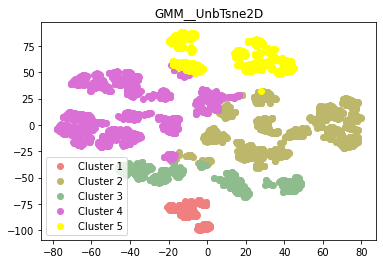

iter 9, loss: 100604.4490: 100%|██████████| 10/10 [00:00<00:00, 80.42it/s]


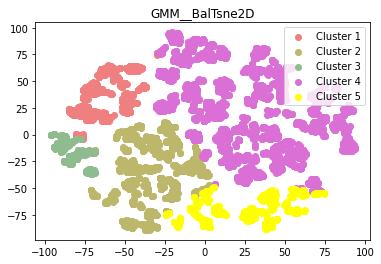

iter 9, loss: 47600.8107: 100%|██████████| 10/10 [00:00<00:00, 154.25it/s]


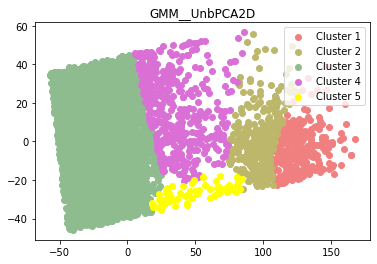

iter 9, loss: 15620.8386: 100%|██████████| 10/10 [00:00<00:00, 158.64it/s]


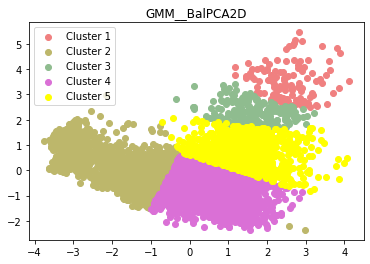

<Figure size 432x288 with 0 Axes>

In [81]:
# Unbalanced 2DTSNE data GMM
gamma, (pi, mu, sigma) = GMM(dfUnbTsne2D_np, K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((5110,1))
data_gmm_iteration = np.concatenate((dfUnbTsne2D_np, cluster_ids), axis=1)
plot_data(data_gmm_iteration,"GMM__UnbTsne2D")

# Balanced 2DTSNE data
gamma, (pi, mu, sigma) = GMM(dfBalTsne2D_np[:,:2], K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((9722,1))
data_gmm_iteration = np.concatenate((dfBalTsne2D_np[:,:2], cluster_ids), axis=1)
plot_data(data_gmm_iteration,"GMM__BalTsne2D")

# Unbalanced 2DPCA data GMM
gamma, (pi, mu, sigma) = GMM(dfUnbPca2D_np[:,:2], K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((5110,1))
data_gmm_iteration = np.concatenate((dfUnbPca2D_np[:,:2], cluster_ids), axis=1)
plot_data(data_gmm_iteration,"GMM__UnbPCA2D")

# Balanced 2DPCA data GMM
gamma, (pi, mu, sigma) = GMM(dfBalPca2D_np[:,:2], K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((5110,1))
data_gmm_iteration = np.concatenate((dfBalPca2D_np[:,:2], cluster_ids), axis=1)
plot_data(data_gmm_iteration,"GMM__BalPCA2D")

iter 9, loss: 56294.3593: 100%|██████████| 10/10 [00:00<00:00, 61.08it/s]


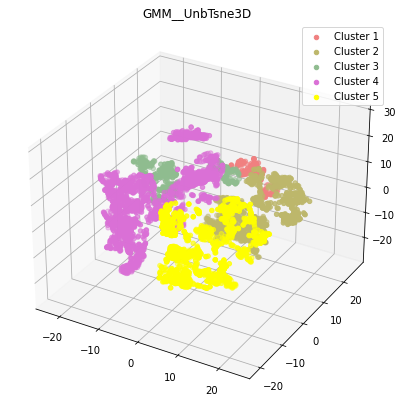

iter 9, loss: 113008.8857: 100%|██████████| 10/10 [00:00<00:00, 52.32it/s]


<Figure size 432x288 with 0 Axes>

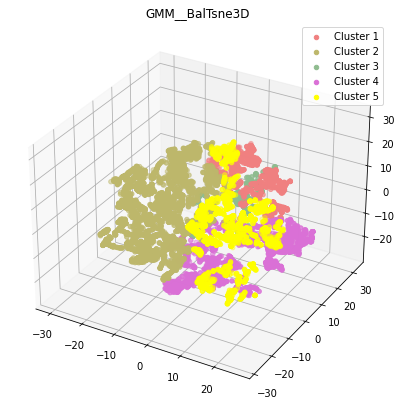

iter 9, loss: 64423.9807: 100%|██████████| 10/10 [00:00<00:00, 111.95it/s]


<Figure size 432x288 with 0 Axes>

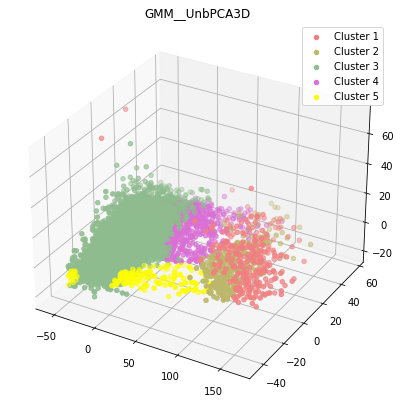

iter 9, loss: 43147.8090: 100%|██████████| 10/10 [00:00<00:00, 82.06it/s]


<Figure size 432x288 with 0 Axes>

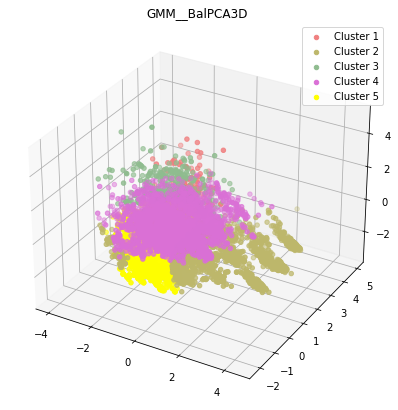

<Figure size 432x288 with 0 Axes>

In [83]:
# Unbalanced 3DTSNE data GMM
gamma, (pi, mu, sigma) = GMM(dfUnbTsne3D_np, K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((5110,1))
data_gmm_iteration = np.concatenate((dfUnbTsne3D_np, cluster_ids), axis=1)
plot_3Ddata(data_gmm_iteration,"GMM__UnbTsne3D")

# Balanced 3DTSNE data GMM
gamma, (pi, mu, sigma) = GMM(dfBalTsne3D_np, K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((9722,1))
data_gmm_iteration = np.concatenate((dfBalTsne3D_np, cluster_ids), axis=1)
plot_3Ddata(data_gmm_iteration,"GMM__BalTsne3D")

# Unbalanced 3DPCA data GMM
gamma, (pi, mu, sigma) = GMM(dfUnbPca3D_np, K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((5110,1))
data_gmm_iteration = np.concatenate((dfUnbPca3D_np, cluster_ids), axis=1)
plot_3Ddata(data_gmm_iteration,"GMM__UnbPCA3D")

# Balanced 3DPCA data GMM
gamma, (pi, mu, sigma) = GMM(dfBalPca3D_np, K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((9722,1))
data_gmm_iteration = np.concatenate((dfBalPca3D_np, cluster_ids), axis=1)
plot_3Ddata(data_gmm_iteration,"GMM__BalPCA3D")